In [4]:
import math
from random import random
import gudhi as gd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def generate_circle(n, radius, max_noise):
    """
    Generate n points on a sphere with the center in the point (0,0) 
    with the given radius. 
    
    Noise is added so that the distance from
    the generated point to some point on the sphere does not
    exceed max_noise parameter.
    
    Returns the list of generated points.    
    """
    points = []
    for i in range(n):
        anglet = 2 * math.pi * random()
        anglep = 2* math.pi *random()
        noise = max_noise * random()
        r = radius * (1 + noise)
        point = [r * math.cos(anglet)*math.cos(anglep), r * math.sin(anglet)*math.cos(anglep),r*math.sin(anglep)]
        points.append(point)
    return np.array(points)

In [33]:
circle = generate_circle(100, 3, 0.1)
fig = go.Figure(data=[go.Scatter3d(x=circle[:,0], y=circle[:,1], z=circle[:,2],
                                   mode='markers')])
fig.show()

In [29]:
def rips_graph(points,mel):
    """
    Generate the Vietoris-Rips complex on the given set of points in 2D.
    Only simplexes up to dimension skeleton are computed.
    The max parameter denotes the distance cut-off value.
    """
    rc = gd.RipsComplex(points=points,max_edge_length=mel)
    st = rc.create_simplex_tree(max_dimension=2)
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3])
    edges = []
    for s in st.get_skeleton(1):
        e = s[0]
        if len(e) == 2:
            edges.append(points[[e[0],e[1]]])
            
    f2 = go.Mesh3d(
        x=points[:,0],
        y=points[:,1],
        z=points[:,2],
        i = triangles[:,0],
        j = triangles[:,1],
        k = triangles[:,2],
    )
    f0 = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode="markers")
    data = [f2, f0]
# Plot edges
    for pts in edges:
        seg = go.Scatter3d(x=pts[:,0],y=pts[:,1],z=pts[:,2],mode="lines",line=dict(color='green'))
        data.append(seg)
    fig = go.Figure(data=data,layout=dict(showlegend=False))
    fig.show()

In [35]:
rips_complex = rips_graph(points=circle, mel=1.5)

In [10]:
def alpha_graph(points):
    """
    Generate the Vietoris-Rips complex on the given set of points in 2D.
    Only simplexes up to dimension skeleton are computed.
    The max parameter denotes the distance cut-off value.
    """
    rc = gd.AlphaComplex(points=points)
    st = rc.create_simplex_tree()
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3])
    fig = go.Figure(data=[
    go.Mesh3d(
        # Use the first 3 coordinates, but we could as easily pick others
        x=points[:,0],
        y=points[:,1],
        z=points[:,2],
        i = triangles[:,0],
        j = triangles[:,1],
        k = triangles[:,2],
    )])
    fig.show()

In [11]:
alpha_complex = alpha_graph(points=circle)

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

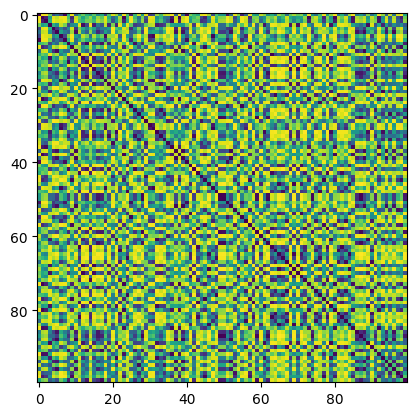

In [11]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(circle)
plt.imshow(D)
plt.show()

In [14]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

In [15]:
r = 1
G = create_simplicial_complex(D,r)

In [17]:
import simplicial as sp
K=sp.SimplicialComplex(G)

AttributeError: 'Graph' object has no attribute 'setComplex'

In [19]:
# Coordinates of the points
points=np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[1,1,1],[1,1,0],[0,1,1]])
# Build the simplicial complex with a tetrahedon, an edge and an isolated vertex
cplx=gd.SimplexTree()
cplx.insert([1,2,3,5])
cplx.insert([4,6])
cplx.insert([0])
# List of triangles (point indices)
triangles = np.array([s[0] for s in cplx.get_skeleton(2) if len(s[0])==3])
# List of edges (point coordinates)
edges = []
for s in cplx.get_skeleton(1):
    e = s[0]
    if len(e) == 2:
        edges.append(points[[e[0],e[1]]])

## With plotly
# Plot triangles
f2 = go.Mesh3d(
        x=points[:,0],
        y=points[:,1],
        z=points[:,2],
        i = triangles[:,0],
        j = triangles[:,1],
        k = triangles[:,2],
    )
# Plot points
f0 = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode="markers")
data = [f2, f0]
# Plot edges
for pts in edges:
    seg = go.Scatter3d(x=pts[:,0],y=pts[:,1],z=pts[:,2],mode="lines",line=dict(color='green'))
    data.append(seg)
fig = go.Figure(data=data,layout=dict(showlegend=False))
# By default plotly would give each edge its own color and legend, that's too much
fig.show()